In [1]:
import numpy as np
import matplotlib.pyplot as plt

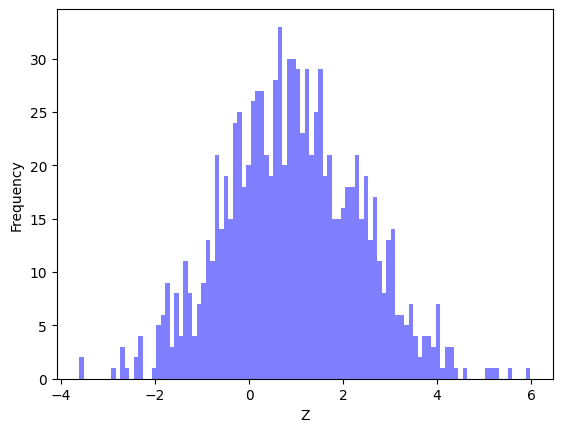

In [2]:
X = np.random.normal(0, 1, 1000)
Y = np.random.normal(1, 1, 1000)
Z = X+Y

plt.hist(Z, bins=100, color='b', alpha=0.5)
plt.xlabel('Z')
plt.ylabel('Frequency')
plt.show()

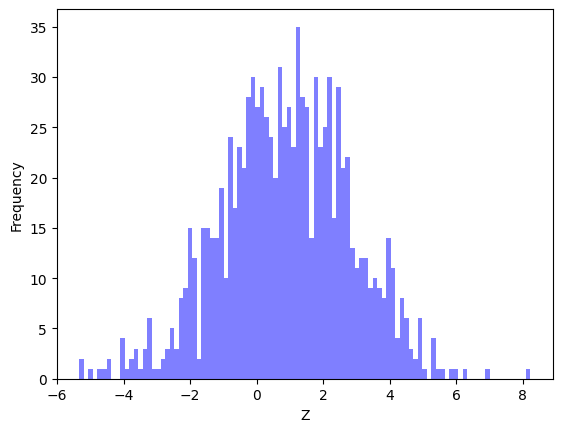

In [3]:
Z = np.random.normal(1, 2, 1000)

plt.hist(Z, bins=100, color='b', alpha=0.5)
plt.xlabel('Z')
plt.ylabel('Frequency')
plt.show()

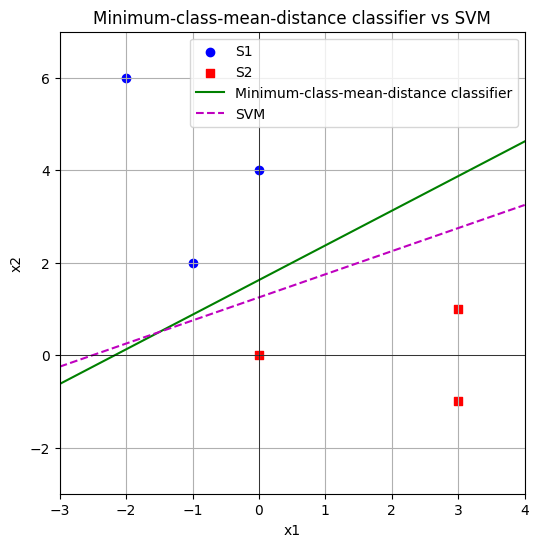

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 정의
S1 = np.array([[-1, 2], [-2, 6], [0, 4]])
S2 = np.array([[0, 0], [3, -1], [3, 1]])

# x1 범위 설정
x1 = np.linspace(-3, 4, 100)

# 두 직선의 방정식 계산
x2_1 = (6*x1 + 13) / 8  # 6x1 - 8x2 + 13 = 0 -> x2 = (6x1 + 13) / 8
x2_2 = (2*x1 + 5) / 4   # 2x1 - 4x2 + 5 = 0 -> x2 = (2x1 + 5) / 4

# 그래프 그리기
plt.figure(figsize=(6, 6))
plt.scatter(S1[:, 0], S1[:, 1], color='blue', marker='o', label='S1')
plt.scatter(S2[:, 0], S2[:, 1], color='red', marker='s', label='S2')
plt.plot(x1, x2_1, 'g-', label='Minimum-class-mean-distance classifier')
plt.plot(x1, x2_2, 'm--', label='SVM')

# 축과 범위 설정
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-3, 4)
plt.ylim(-3, 7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.title('Minimum-class-mean-distance classifier vs SVM')
plt.show()


In [3]:
import pandas as pd

In [15]:
data_svm_lin.describe()

,0,1,2
count,400.000000,400.000000,400.000000
mean,-0.963734,1.060537,0.500000
std,1.102170,1.098059,0.500626
min,-2.847000,-1.948300,0.000000
25%,-1.996950,0.108752,0.000000
50%,-1.127300,1.303650,0.500000
75%,0.056756,2.038950,1.000000
max,1.474100,2.871200,1.000000


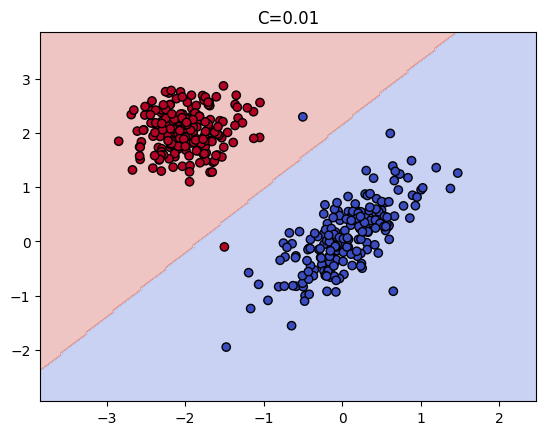

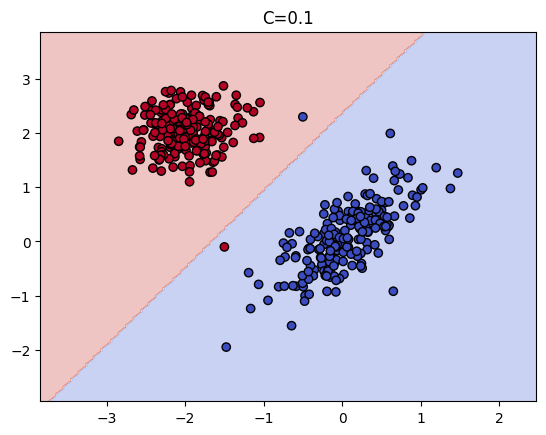

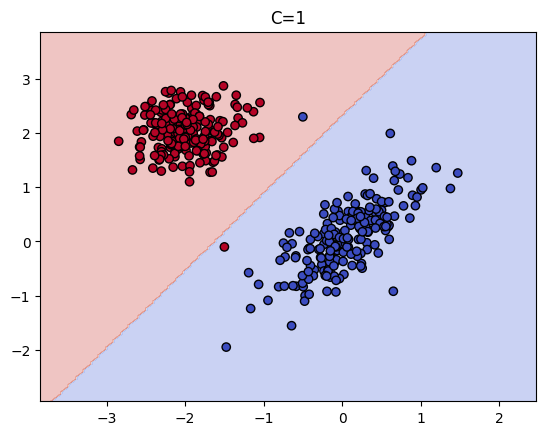

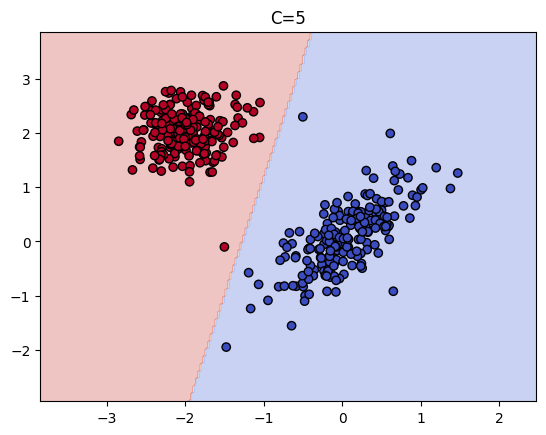

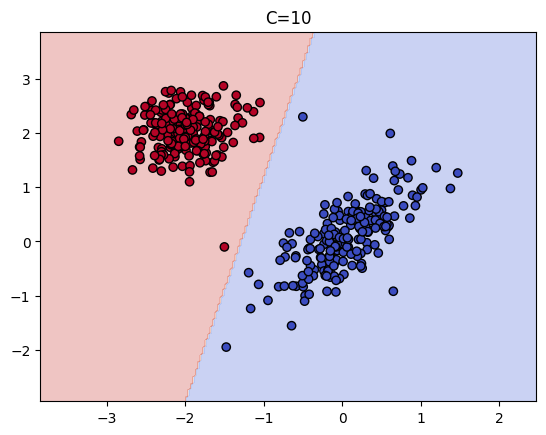

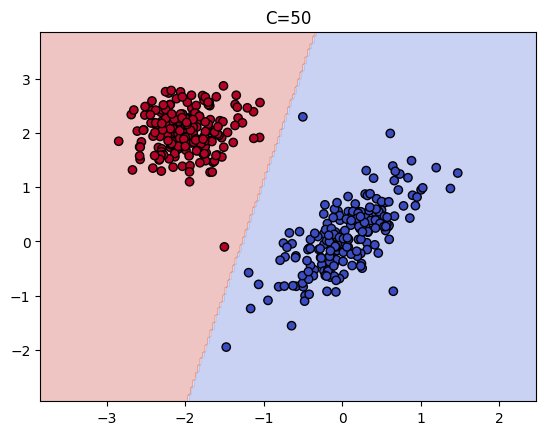

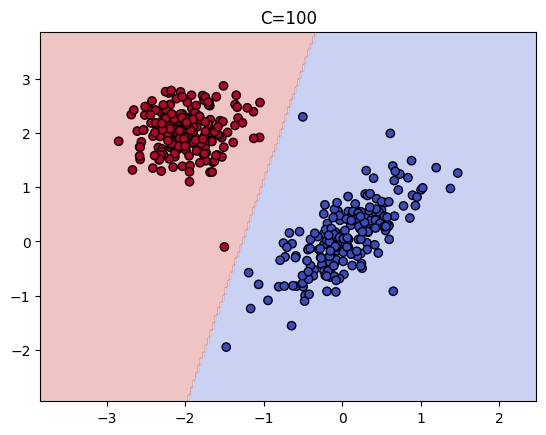

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 데이터 로드
data_svm_lin = pd.read_csv('../data_svm_lin.csv', header=None)
X = data_svm_lin.iloc[:, 0:2].values
y = data_svm_lin.iloc[:, 2].values

# 결정 경계 시각화 함수
def plot_decision_boundary(clf, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.show()

# 여러 개의 C 값 실험
for C in [0.01, 0.1, 1, 5, 10, 50, 100]:
    clf = SVC(kernel='linear', C=C) 
    clf.fit(X, y)
    plot_decision_boundary(clf, X, y, f"C={C}")



In [13]:
data_svm_rbf = pd.read_csv('../data_svm_rbf.csv', header=None)

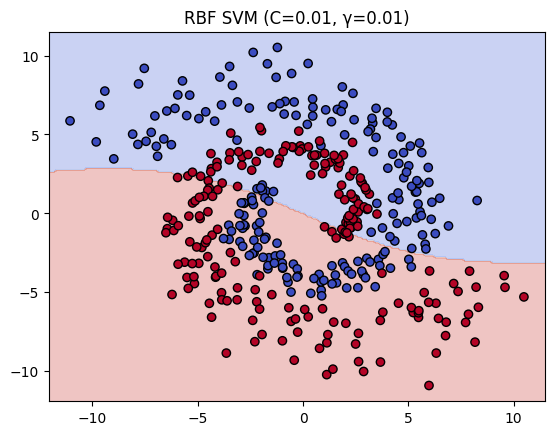

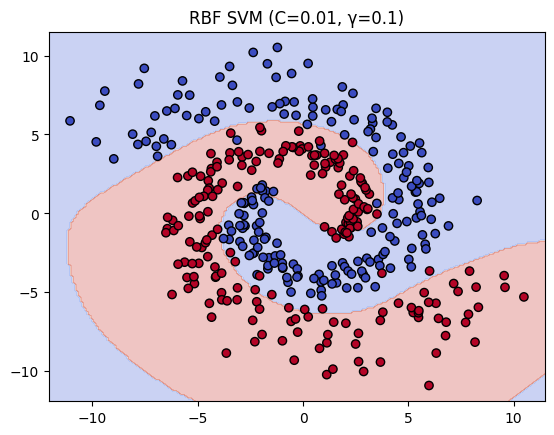

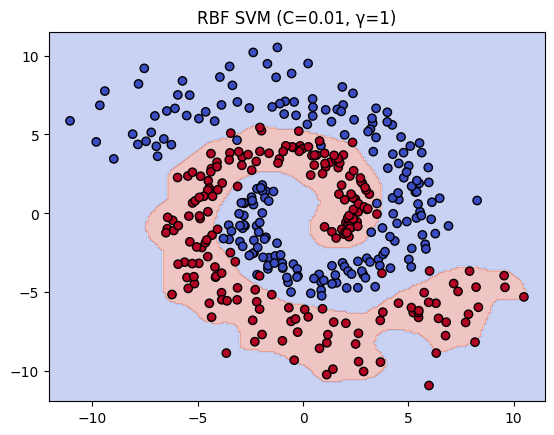

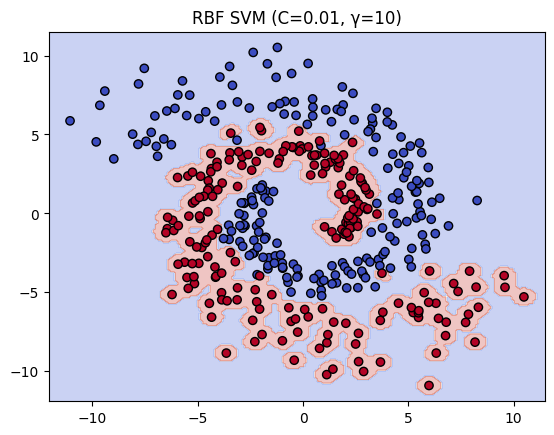

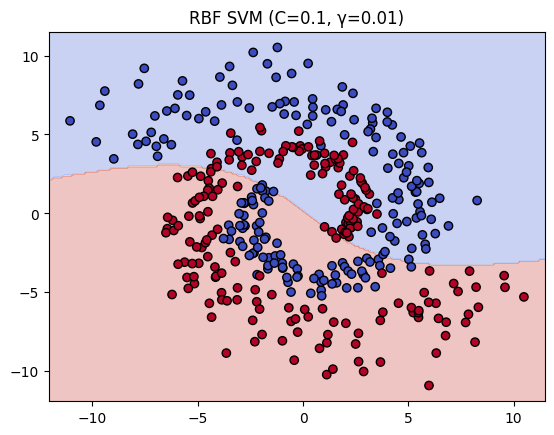

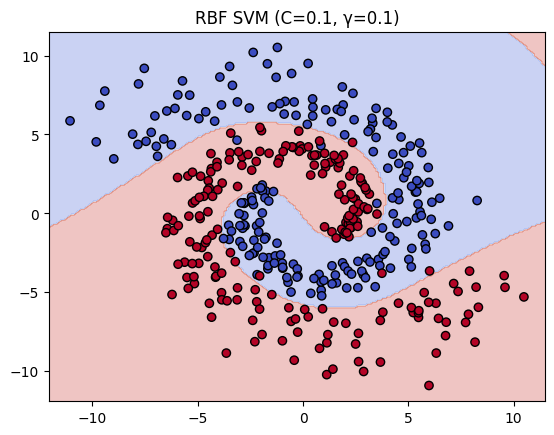

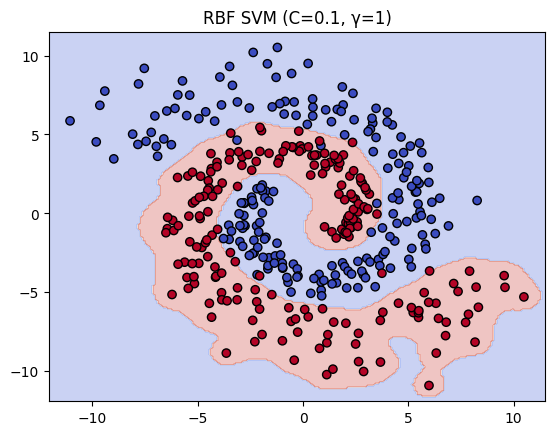

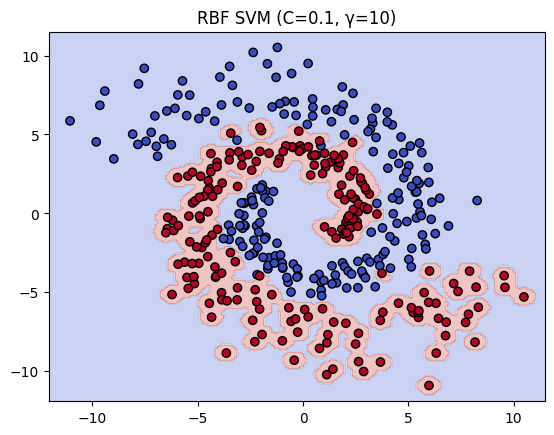

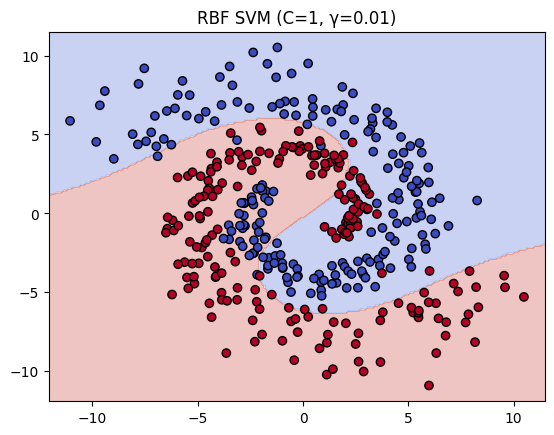

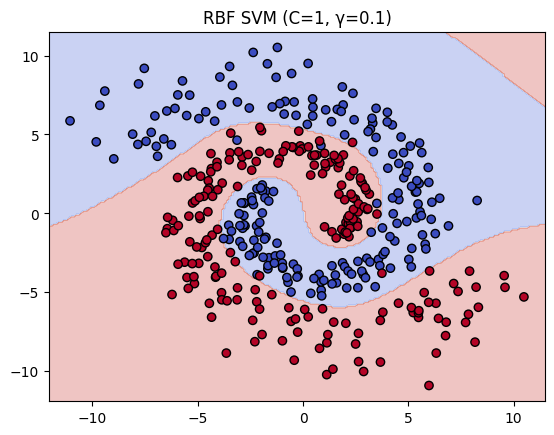

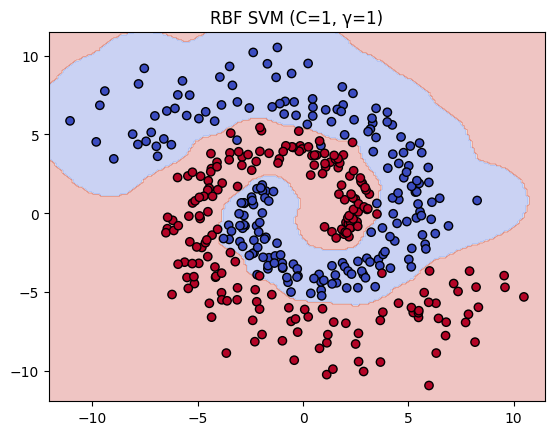

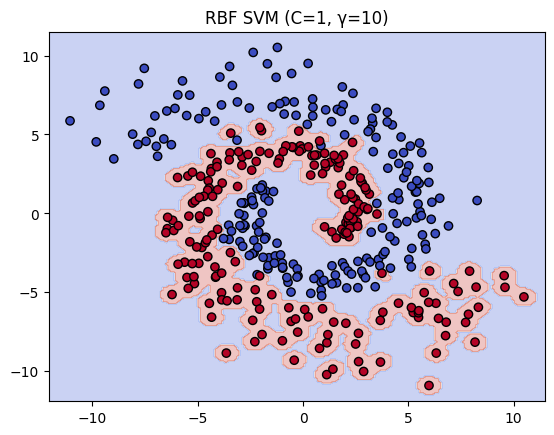

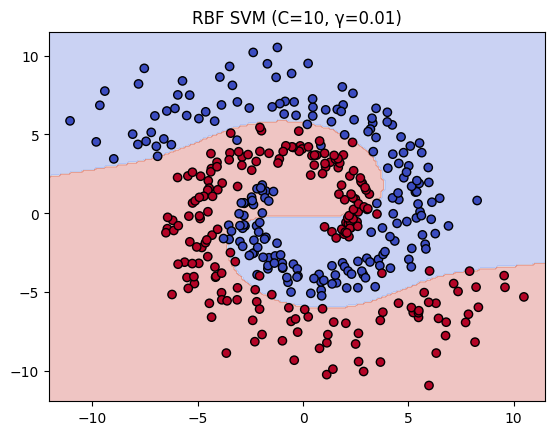

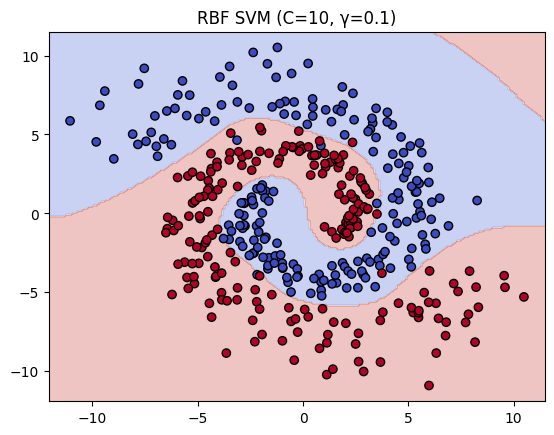

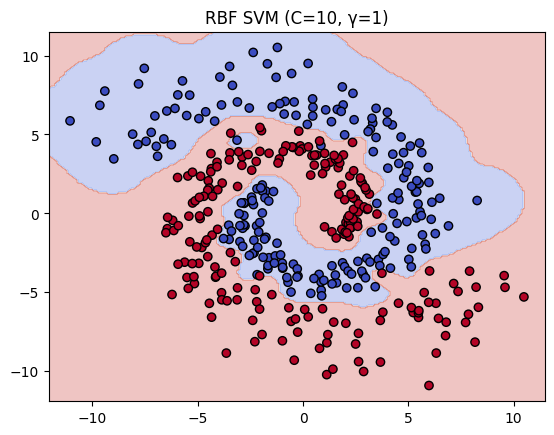

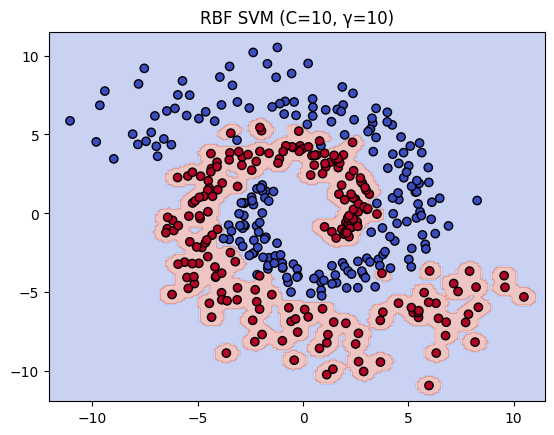

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 데이터 로드
data_svm_rbf = pd.read_csv('../data_svm_rbf.csv', header=None)
X = data_svm_rbf.iloc[:, 0:2].values
y = data_svm_rbf.iloc[:, 2].values

# 결정 경계 시각화 함수
def plot_decision_boundary(clf, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(title)
    plt.show()
    
C_values = [0.01, 0.1, 1, 10]  # Regularization coefficient
gamma_values = [0.01, 0.1, 1, 10]  # RBF Kernel width

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel="rbf", C=C, gamma=gamma)
        model.fit(X, y)
        plot_decision_boundary(model, X, y, f"RBF SVM (C={C}, γ={gamma})")
